In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
seed = 7
np.random.seed(seed)

In [4]:
# generate noisy data from an underlying function
def createSineData(n, scale=0.1):
    #x = np.random.uniform(low=-np.pi, high=np.pi, size=(n,1))
    x = np.linspace(1,5,n).reshape(-1,1)
    y = np.sin(x) # our true function
    e = np.random.normal(loc=0.0, scale=scale, size=(n,1)) # add some noise
    y += e
    return x, y

(30, 1) (30, 1)


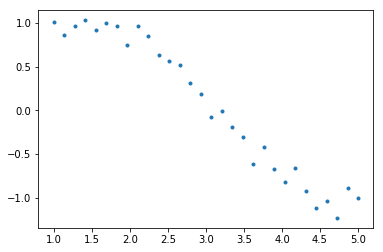

In [5]:
x, y = createSineData(30)
print(x.shape, y.shape)
plt.plot(x,y,'.')
plt.show()

In [15]:
x2, y2 = createSineData(30,0.2)
x3, y3 = createSineData(30,0.3)
x4, y4 = createSineData(30,0.4)

0.00717869641262


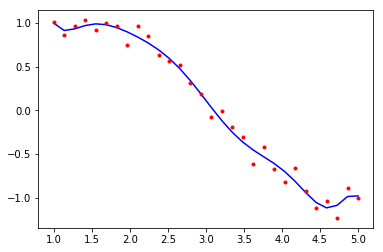

In [21]:
degree = 10
model = Pipeline([('poly', PolynomialFeatures(degree=degree)),('linear', linear_model.LinearRegression())])
model=model.fit(x, y)
y_pred = model.predict(x)
loss = np.mean((y - y_pred) ** 2)
print(loss)
plt.plot(x, y_pred, 'b', label='degree ' + str(degree))
plt.plot(x, y, 'r.')
plt.show()

In [12]:
def get_bias(degress):
    loss = []
    degree = 10
    for degree in degress:
        model = Pipeline([('poly', PolynomialFeatures(degree=degree)),('linear', linear_model.LinearRegression())])
        model=model.fit(x, y)
        y_pred = model.predict(x)
        l = np.mean((y - y_pred) ** 2)
        loss.append(l)
    return loss

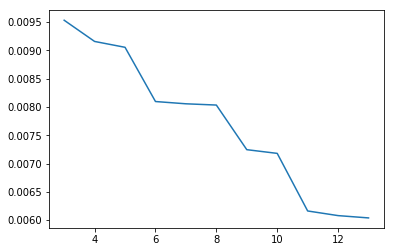

In [13]:
degress = range(3,14)
bs = get_bias(degress)
plt.plot(degress, bs)
plt.show()

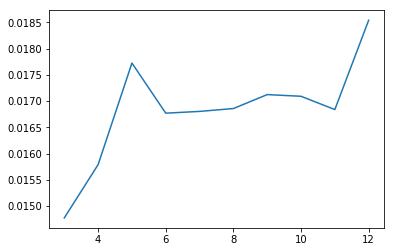

In [17]:
def get_y_pred(degree, x, y):
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),('linear', linear_model.LinearRegression())])
    model=model.fit(x, y)
    y_pred = model.predict(x)
    return y_pred

def get_variance(degress):
    v = []
    for degree in degress:
        
        y_pred = get_y_pred(degree, x, y)
        
        y_pred_2 = get_y_pred(degree, x2, y2)
        y_pred_3 = get_y_pred(degree, x3, y3)
        y_pred_4 = get_y_pred(degree, x4, y4)
        y_pred_mean = (y_pred_2 + y_pred_3 + y_pred_4) / 3.0
        var = (y - y_pred_mean) ** 2
        v.append(np.mean(var))
        
    return v

degress = range(3,13)
vs = get_variance(degress)
plt.plot(degress, vs)
plt.show()

0.0319738694291
0.00952962332359
0.00905174334043
0.00724416689276


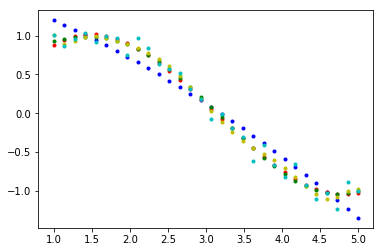

In [22]:
plot_config=['bs', 'b*', 'g^']
c = ['b.','r.','g.','y.','m.','c.']
count = 0
# 3. Set the polynomial degree to be fitted betwee 1 and 3
top_degree=5
d_degree = np.arange(1,top_degree+1)
for degree in [2,3,5,9]:
    # Create a fit a polynomial with sk-learn LinearRegression
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),('linear', linear_model.LinearRegression())])
    model=model.fit(x, y)
    y_pred = model.predict(x)
    loss = np.mean((y - y_pred) ** 2)
    print(loss)
    plt.plot(x, y_pred, c[count], label='degree ' + str(degree))
    count += 1
plt.plot(x, y, c[-1])
plt.show()